<a href="https://colab.research.google.com/github/lnpetrova/comp_ling/blob/master/ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Импорты**

In [0]:
import pandas as pd

In [0]:
import pandas as pd
from sklearn.cluster import AffinityPropagation, \
                            KMeans, MiniBatchKMeans, Birch, MeanShift, DBSCAN, SpectralClustering, OPTICS
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, \
                            silhouette_score

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn import metrics
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import files
files.upload()

Saving data.csv to data.csv


In [0]:
data = pd.read_csv('data.csv')

In [6]:
data.head(5)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,757a85cd1cb3,b4b6f38f786a,Ростовская область,Таганрог,Бытовая электроника,Телефоны,Xiaomi,NaN,NaN,Xiaomi RedMI 4a,"Телефон новый, не использованный, в заводской ...",6900.0,22,2017-03-26,Private,9403908e0f7a71528ecf8a07077733f6178175f3b33c1b...,2944.0,0.16933
1,fac21c7864e9,1bad10362240,Челябинская область,Усть-Катав,Транспорт,Автомобили,С пробегом,Audi,Q5,"Audi Q5, 2009",Продам автомобиль AUDI SUV Stronic Quattro 2.0...,890000.0,6,2017-03-16,Private,cb3ea40d48be0795d4f9149b07d69606221c859be2a65d...,1132.0,0.26029
2,0ab9d9f84260,b1e40dd45fa1,Омская область,Омск,Личные вещи,Детская одежда и обувь,Для мальчиков,Верхняя одежда,98-104 см (2-4 года),Толстовка очень теплая,"на меху, очень теплая, хорошее состояние , бол...",500.0,123,2017-03-27,Private,68ec1a7bce8d019d60a8685c179f13e60390857e5494cf...,61.0,0.80323
3,9a743c7d0787,7eaee75271c8,Омская область,Омск,Бытовая электроника,Телефоны,iPhone,NaN,NaN,"Продаю айфон 6 16 гб сильвер с зарядкой,без ко...","Продаю айфон 6 16 гб сильвер с зарядкой,без ко...",23000.0,7,2017-03-15,Private,25ec86e255768c7645a0b5e6a8e5c05f5ae362e7daa0d6...,2918.0,0.03486
4,f20041153ca0,82c7f87322b0,Башкортостан,Уфа,Животные,Аквариум,NaN,NaN,NaN,Аквариум,Аквариум для маленьких рыбок+корм+грунт+подста...,1000.0,109,2017-03-25,Company,15859cf907e234799cb756017178d05dd211d05f4a181f...,1718.0,0.00000


In [0]:
data = data[['category_name', 'title']]

In [8]:
data.shape

(138715, 2)

In [0]:
def create_clusters(X, cluster_model):
  cluster_model.fit(X)
  labels = cluster_model.labels_
  return labels

In [0]:
def show_metrics(X, y, labels):
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels)) # проверяет, что в кластере объекты одного класса
  print("Completeness: %0.3f" % metrics.completeness_score(y, labels)) # проверяет, что объекты класса только в одном кластере
  print("V-measure: %0.3f" % metrics.v_measure_score(y, labels)) # превращает обе метрики в одну 

# **Задание1. Count_Vectorizer или TfidfVectorizer** 

**Affinity Propagation**

In [0]:
#Поэкспериментируем с параметрами CountVectorize и TfidfVectorizer
cv = CountVectorizer(max_features = 100, max_df=0.9, min_df=5, ngram_range=(1, 3))
cv1 = CountVectorizer(max_df=0.9, min_df=5, max_features=100, analyzer='char_wb', ngram_range=(10,15))
cv2 = CountVectorizer(max_features = 100, max_df=0.9, min_df=5)
tfidf = TfidfVectorizer(max_df=0.8, min_df=6, max_features = 400, ngram_range=(1, 3))
tfidf1 = TfidfVectorizer(max_df=0.8, min_df=6, max_features = 400, analyzer='char_wb', ngram_range=(7,15))
tfidf2= TfidfVectorizer(max_df=0.5, min_df=6)

In [0]:
sample = data.sample(frac=0.01)
X_cv = cv.fit_transform(sample['title'])
X_cv1 = cv1.fit_transform(sample['title'])
X_cv2 = cv2.fit_transform(sample['title'])
X_tfidf = tfidf.fit_transform(sample['title'])
X_tfidf1 = tfidf1.fit_transform(sample['title'])
X_tfidf2 = tfidf2.fit_transform(sample['title'])
y = sample['category_name']

In [0]:
AP = AffinityPropagation(damping=0.7, preference=-5, 
                              max_iter=500, verbose=2)

In [125]:
APlabels_cv = create_clusters(X_cv, AP)
APlabels_cv1 = create_clusters(X_cv1, AP)
APlabels_cv2 = create_clusters(X_cv2, AP)

Converged after 130 iterations.
Converged after 196 iterations.
Converged after 183 iterations.


In [207]:
APlabels_tfidf = create_clusters(X_tfidf, AP)
APlabels_tfidf1 = create_clusters(X_tfidf1, AP)
APlabels_tfidf2 = create_clusters(X_tfidf2, AP)

Converged after 169 iterations.
Converged after 166 iterations.
Converged after 207 iterations.


In [153]:
show_metrics(X_cv, y, APlabels_cv) #ngrams
show_metrics(X_cv1, y, APlabels_cv1) #charngrams
show_metrics(X_cv2, y, APlabels_cv2) #words

Homogeneity: 0.389
Completeness: 0.400
V-measure: 0.395
Homogeneity: 0.374
Completeness: 0.387
V-measure: 0.380
Homogeneity: 0.407
Completeness: 0.409
V-measure: 0.408


In [208]:
show_metrics(X_tfidf, y, APlabels_tfidf) #ngrams
show_metrics(X_tfidf1, y, APlabels_tfidf1) #charngrams
show_metrics(X_tfidf2, y, APlabels_tfidf2) #words

Homogeneity: 0.369
Completeness: 0.404
V-measure: 0.385
Homogeneity: 0.414
Completeness: 0.404
V-measure: 0.409
Homogeneity: 0.807
Completeness: 0.435
V-measure: 0.566


Рассмотрим лучшие результаты, в обоих случаях это варианты с униграммами по метрикам. Однако в случае tfidf при оценке "на глаз" лучше справляются варианты с символьными нграммами. 
Вариант с униграммами разбивает на слишком большое количество кластеров (больше 500). 

In [0]:
sample['AP_cv2'] = APlabels_cv2
sample['AP_tfidf1'] = APlabels_tfidf1

In [221]:
max(sample.AP_tfidf2)

529

In [0]:
del sample['AP_tfidf2']

In [237]:
sample[sample.AP_tfidf1==17].head(10)

,category_name,title,AP_cv2,AP_tfidf1
38093,Товары для детей и игрушки,Молокоотсос medela ручной б/у,10,17
26890,Мебель и интерьер,Продается б/у стол универсальный 90*60*77 см,19,17
37342,Детская одежда и обувь,Чешки б/у,10,17
90866,Мебель и интерьер,Кухня б/у,10,17
62518,Мебель и интерьер,Стеллаж металлический б/у,10,17
38077,Мебель и интерьер,Б/У Матрац 1800*2000,10,17
111943,Мебель и интерьер,Диван и кресло б/у,10,17


V-measure для алгоритмов с TfidfVectorizer (409) и CountVectorizer (408) одинаковая, поэтому по этому параметру сложно судить. По моему мнению, лучше справляется алгоритм с TfidfVectorizer: он более подробно и точно кластеризует данные, что видно по метрикам (Homogeneity выше).

**KMeans**

In [0]:
cv = CountVectorizer(max_features = 100, max_df=0.6, min_df=5, ngram_range=(1, 3))
cv1 = CountVectorizer(max_df=0.6, min_df=5, max_features=100, analyzer='char_wb', ngram_range=(10,15))
cv2 = CountVectorizer(max_features = 100, max_df=0.6, min_df=5)
tfidf = TfidfVectorizer(max_df=0.8, min_df=6, max_features = 100, ngram_range=(1, 3))
tfidf1 = TfidfVectorizer(max_df=0.8, min_df=6, max_features = 100, analyzer='char_wb', ngram_range=(10,15))
tfidf2= TfidfVectorizer(max_df=0.8, min_df=6)

In [0]:
KMsample = data.sample(frac=0.01)
km_X_cv = cv.fit_transform(KMsample['title'])
km_X_cv1 = cv1.fit_transform(KMsample['title'])
km_X_cv2 = cv2.fit_transform(KMsample['title'])
km_X_tfidf = tfidf.fit_transform(KMsample['title'])
km_X_tfidf1 = tfidf1.fit_transform(KMsample['title'])
km_X_tfidf2 = tfidf2.fit_transform(KMsample['title'])
y = KMsample['category_name']

In [0]:
#Количество кластеров возьмем немного больше, чем в самом датасете(47).
KM = KMeans(n_clusters=55, random_state=42, max_iter=1000, n_jobs=5, algorithm='full')

In [0]:
KMlabels_cv = create_clusters(km_X_cv, KM)
KMlabels_cv1 = create_clusters(km_X_cv1, KM)
KMlabels_cv2 = create_clusters(km_X_cv2, KM)

In [0]:
KMlabels_tfidf= create_clusters(km_X_tfidf, KM)
KMlabels_tfidf1= create_clusters(km_X_tfidf1, KM)
KMlabels_tfidf2= create_clusters(km_X_tfidf2, KM)

In [285]:
show_metrics(km_X_cv, y, KMlabels_cv) #ngrams
show_metrics(km_X_cv1, y, KMlabels_cv1) #charngrams
show_metrics(km_X_cv2, y, KMlabels_cv2) #words

Homogeneity: 0.322
Completeness: 0.392
V-measure: 0.353
Homogeneity: 0.332
Completeness: 0.385
V-measure: 0.356
Homogeneity: 0.338
Completeness: 0.405
V-measure: 0.369


In [286]:
show_metrics(km_X_tfidf, y, KMlabels_tfidf) #ngrams
show_metrics(km_X_tfidf1, y, KMlabels_tfidf1) #charngrams
show_metrics(km_X_tfidf2, y, KMlabels_tfidf2) #words

Homogeneity: 0.361
Completeness: 0.398
V-measure: 0.379
Homogeneity: 0.359
Completeness: 0.385
V-measure: 0.371
Homogeneity: 0.377
Completeness: 0.411
V-measure: 0.393


Снова рассмотрим лучшие результаты (снова варианты с униграммами) по V-мере, которая объединяет Homogeneity и Completeness. 

In [0]:
KMsample['KMlabels_cv2'] = KMlabels_cv2
KMsample['KMlabels_tfidf2'] = KMlabels_tfidf2

In [307]:
KMsample[KMsample.KMlabels_cv2 == 27].head(10)

,category_name,title,KMlabels_tfidf2,KMlabels_cv2
53019,Детская одежда и обувь,Сапоги резиновые,35,27
134703,"Одежда, обувь, аксессуары",Сапоги резиновые,35,27
54999,Детская одежда и обувь,Сапоги межсезонье р29,37,27
109083,"Одежда, обувь, аксессуары",Сапоги демисезонные,37,27
1618,Детская одежда и обувь,Зимние сапоги,37,27
44160,"Одежда, обувь, аксессуары",Сапоги зима,37,27
117837,"Одежда, обувь, аксессуары",Сапоги,37,27
14074,Детская одежда и обувь,Сапоги резиновые,35,27
8512,"Одежда, обувь, аксессуары",Сапоги демисезонные,37,27
74541,"Одежда, обувь, аксессуары",Сапоги женские весна,37,27


Этот алгоритм и с CountVectorizer, и с TfidfVectorizer справляется примерно одинаково, если сравнивать результаты визуально. Можно судить по V-measure, что TfidfVectorizer все-таки справляется немного лучше.

V-measure для алгоритма с TfidfVectorizer немного выше. Этот алгоритм и с CountVectorizer, и с TfidfVectorizer справляется примерно одинаково, если сравнивать результаты визуально, однако с tfidf иногда кластеризация точнее.


**MiniBatchKM**

In [0]:
cv = CountVectorizer(max_features = 100, max_df=0.4, min_df=5, ngram_range=(1, 3))
cv1 = CountVectorizer(max_df=0.4, min_df=5, max_features=100, analyzer='char_wb', ngram_range=(10,15))
cv2 = CountVectorizer(max_features = 100, max_df=0.4, min_df=5)
tfidf = TfidfVectorizer(max_df=0.4, min_df=6, max_features = 100, ngram_range=(1, 3))
tfidf1 = TfidfVectorizer(max_df=0.4, min_df=6, max_features = 100, analyzer='char_wb', ngram_range=(10,15))
tfidf2= TfidfVectorizer(max_df=0.4, min_df=6)

In [0]:
MBsample = data.sample(frac=0.01)
MBX_cv = cv.fit_transform(MBsample['title'])
MBX_cv1 = cv1.fit_transform(MBsample['title'])
MBX_cv2 = cv2.fit_transform(MBsample['title'])
MBX_tfidf = tfidf.fit_transform(MBsample['title'])
MBX_tfidf1 = tfidf1.fit_transform(MBsample['title'])
MBX_tfidf2 = tfidf2.fit_transform(MBsample['title'])
y = MBsample['category_name']

In [0]:
MBKMeans = MiniBatchKMeans(n_clusters=55, init_size=500, \
                                   verbose=3, max_iter=1000, batch_size=1000, random_state=42, \
                                   max_no_improvement=200, reassignment_ratio=0.02)

In [0]:
MBlabels_cv = create_clusters(MBX_cv, MBKMeans)
MBlabels_cv1 = create_clusters(MBX_cv1, MBKMeans)
MBlabels_cv2 = create_clusters(MBX_cv2, MBKMeans)

In [321]:
show_metrics(MBX_cv, y, MBlabels_cv)
show_metrics(MBX_cv1, y, MBlabels_cv1)
show_metrics(MBX_cv2, y, MBlabels_cv2)

Homogeneity: 0.351
Completeness: 0.378
V-measure: 0.364
Homogeneity: 0.343
Completeness: 0.370
V-measure: 0.356
Homogeneity: 0.362
Completeness: 0.383
V-measure: 0.372


In [0]:
MBlabels_tfidf = create_clusters(MBX_tfidf, MBKMeans)
MBlabels_tfidf1 = create_clusters(MBX_tfidf1, MBKMeans)
MBlabels_tfidf2 = create_clusters(MBX_tfidf2, MBKMeans)

In [323]:
show_metrics(MBX_tfidf, y, MBlabels_tfidf)
show_metrics(MBX_tfidf1, y, MBlabels_tfidf1)
show_metrics(MBX_tfidf2, y, MBlabels_tfidf2)

Homogeneity: 0.366
Completeness: 0.405
V-measure: 0.384
Homogeneity: 0.366
Completeness: 0.382
V-measure: 0.374
Homogeneity: 0.384
Completeness: 0.394
V-measure: 0.389


Снова рассмотрим варианты с лучшими результатами V-measure. MBX_tfidf и MBX_tfidf2 показывают примерно одинаковый результат, поэтому рассмотрим оба.

In [0]:
MBsample['MBlabels_cv2'] = MBlabels_cv2
MBsample['MBlabels_tfidf2'] = MBlabels_tfidf2
MBsample['MBlabels_tfidf'] = MBlabels_tfidf

In [336]:
MBsample[MBsample.MBlabels_tfidf2==19].head(10)

,category_name,title,MBlabels_cv2,MBlabels_tfidf2,MBlabels_tfidf
97036,Детская одежда и обувь,Geox туфли,1,19,33
106288,Детская одежда и обувь,Новые туфли для девочки,6,19,36
74942,Детская одежда и обувь,Туфли Кенгуру,1,19,33
49618,"Одежда, обувь, аксессуары",Туфли красивые,1,19,33
124153,"Одежда, обувь, аксессуары",Туфли (новые) замша,26,19,33
15887,"Одежда, обувь, аксессуары",Туфли летние мужские новые,26,19,33
108106,"Одежда, обувь, аксессуары","Туфли, сабо",1,19,33
131126,"Одежда, обувь, аксессуары",Туфли,1,19,33
24682,Детская одежда и обувь,Туфли,1,19,33
20901,"Одежда, обувь, аксессуары",Лоферы ботинки туфли Nando Muzi новые,26,19,33


V-measure у TfidfVectorizer выше, однако визуально по результатам сложно утверждать, что работает лучше. 

 ***Вывод:***

На примере этих 3 алгоритмов TfidfVectorizer работает все-таки немного лучше, хотя V-measure, учитывающая метрики Homogeneity и Completeness, зачастую бывает примерно одинаковой и у TfidfVectorizer, и у CountVectorizer. 

# **Задание2. TruncatedSVD или NMF**

**KMeans**

In [0]:
km_sample = data.sample(frac=0.01)
tfidf = TfidfVectorizer(max_df=0.8, min_df=6, max_features = 400, ngram_range=(1, 3))
svd = TruncatedSVD(100)
X = tfidf.fit_transform(km_sample['title'])
X_svd = svd.fit_transform(X)
nmf = NMF(100)
X_nmf = nmf.fit_transform(X)
y = km_sample['category_name']

In [0]:
KM = KMeans(n_clusters=55, random_state=42, max_iter=1000, n_jobs=5, algorithm='full')

In [0]:
KMlabels_svd = create_clusters(X_svd, KM)

In [0]:
KMlabels_nmf = create_clusters(X_nmf, KM)

In [350]:
show_metrics(X_svd, y, KMlabels_svd)

Homogeneity: 0.368
Completeness: 0.401
V-measure: 0.384


In [351]:
show_metrics(X_nmf, y, KMlabels_nmf)

Homogeneity: 0.346
Completeness: 0.388
V-measure: 0.366


In [0]:
km_sample['KMlabels_svd'] = KMlabels_svd
km_sample['KMlabels_nmf'] = KMlabels_nmf

In [368]:
km_sample[km_sample.KMlabels_nmf==32].head(20)

,category_name,title,KMlabels_svd,KMlabels_nmf
56734,Предложение услуг,Услуги автокрана и другой спецтехники от владе...,41,32
32714,Детская одежда и обувь,Детские новые вещи от 1 года до 5 лет,27,32
56443,"Одежда, обувь, аксессуары",Джегинсы от магазина топ шоп,1,32
16512,Ремонт и строительство,"Очиститель от бетона, клея, ржавчины Барракуда...",1,32
86436,Коммерческая недвижимость,"Открытая площадка, 2000 м². От собственника",1,32
12696,Аудио и видео,Гарнитура от iPhone 4s,14,32
80743,Собаки,Щенки бивера от Чемпионов!,1,32
5242,Детская одежда и обувь,Нарядное платье. На рост от 98 до 110,27,32


TruncatedSVD работает лучше для кластеризации алгоритмом KMeans, как показывают метрики. 

**Spectral Clustering**

In [0]:
SC_sample = data.sample(frac=0.01)
tfidf = TfidfVectorizer(max_df=0.7, min_df=6, max_features=500, ngram_range=(1,3))
svd = TruncatedSVD(100)
X = tfidf.fit_transform(SC_sample['title'])
X_svd = svd.fit_transform(X)
nmf = NMF(100)
X_nmf = nmf.fit_transform(X)
y = SC_sample['category_name']

In [0]:
SC = SpectralClustering(affinity='rbf', coef0=0.8, degree=4,
          gamma=1.0, n_clusters=55, 
          n_init=10, n_jobs=5, n_neighbors=10,
          random_state=42)

In [0]:
SClabels_svd = create_clusters(X_svd, SC)

In [385]:
show_metrics(X_svd, y, SClabels_svd)

Homogeneity: 0.379
Completeness: 0.417
V-measure: 0.397


In [0]:
SClabels_nmf = create_clusters(X_nmf, SC)

In [387]:
show_metrics(X_nmf, y, SClabels_nmf)

Homogeneity: 0.357
Completeness: 0.399
V-measure: 0.377


In [0]:
SC_sample['SClabels_svd'] = SClabels_svd
SC_sample['SClabels_nmf'] = SClabels_nmf

In [407]:
SC_sample[SC_sample.SClabels_nmf==39].head(10)

,category_name,title,SClabels_svd,SClabels_nmf
7587,Комнаты,"Комната 11.1 м² в 9-к, 1/3 эт.",35,39
46602,Ремонт и строительство,Выключатель автоматический 12 штук. Цена догов...,1,39
123329,Комнаты,"Комната 12 м² в 4-к, 7/9 эт.",35,39
7707,Билеты и путешествия,"Греция, о. Крит из Уфы с 6 мая на 12 ночей",1,39
105428,Детская одежда и обувь,Куртка для девочки 10-12 лет,44,39
60491,Комнаты,"Комната 18 м² в 3-к, 8/9 эт.",35,39
112065,Комнаты,"Комната 18 м² в 1-к, 3/3 эт.",35,39
77601,Комнаты,"Комната 12 м² в 2-к, 2/2 эт.",35,39
124764,Товары для детей и игрушки,Электрокачель до 12 кг все работает,1,39
127170,Комнаты,"Комната 18 м² в > 9-к, 3/5 эт.",35,39


В этом случае также получается результат лучше при использовании TruncatedSVD. C таким разложением кластеры определяются более точно (более подробная кластеризация), метрики тоже выше.  

**MiniBatchKMeans**

In [0]:
MBKM_sample = data.sample(frac=0.01)
tfidf = TfidfVectorizer(max_df=0.7, min_df=6, max_features=500, ngram_range=(1,3))
svd = TruncatedSVD(100)
X = tfidf.fit_transform(MBKM_sample['title'])
X_svd = svd.fit_transform(X)
nmf = NMF(100)
X_nmf = nmf.fit_transform(X)
y = MBKM_sample['category_name']

In [0]:
MBKMeans = MiniBatchKMeans(n_clusters=55, init_size=500, \
                                   verbose=2, max_iter=1000, batch_size=1000, random_state=42, \
                                   max_no_improvement=200, reassignment_ratio=0.04)

In [0]:
MBKMlabels_svd = create_clusters(X_svd,MBKMeans)

In [0]:
MBKMlabels_nmf = create_clusters(X_nmf, MBKMeans)

In [412]:
show_metrics(X_svd, y, MBKMlabels_svd)

Homogeneity: 0.361
Completeness: 0.393
V-measure: 0.376


In [413]:
show_metrics(X_nmf, y, MBKMlabels_nmf)

Homogeneity: 0.371
Completeness: 0.415
V-measure: 0.391


In [0]:
MBKM_sample['MBKMlabels_svd'] = MBKMlabels_svd
MBKM_sample['MBKMlabels_nmf'] = MBKMlabels_nmf

In [436]:
MBKM_sample[MBKM_sample.MBKMlabels_nmf==39].head(10)

,category_name,title,MBKMlabels_svd,MBKMlabels_nmf
20542,Квартиры,"1-к квартира, 32 м², 4/5 эт.",3,39
93144,Квартиры,"1-к квартира, 32 м², 2/5 эт.",3,39
22278,"Дома, дачи, коттеджи",Дом 32 м² на участке 6 сот.,1,39
103328,"Дома, дачи, коттеджи",Дом 32 м² на участке 10 сот.,1,39
94187,Квартиры,"1-к квартира, 32 м², 1/5 эт.",3,39


Несмотря на то, что с разложением TruncatedSVD метрики ниже,чем с NMF, но если посмотреть на примеры, то видно, что  алгоритм с разложением TruncatedSVD кластеризует лучше в целом. Кластеры, по моему мнению, получаются более обоснованными.

***Вывод:***

На этих 3 примерах видно, что разложение TruncatedSVD работает лучше, чем NMF. V-measure с TruncatedSVD  в 2 случаях из 3 выше.

# **Задание3. Выбросы**

**DBSCAN**

In [0]:
dbsample = data.sample(frac=0.01)
tfidf = TfidfVectorizer(max_df=0.7, min_df=6, max_features=500, ngram_range=(1,3))
svd = TruncatedSVD(100)
X = tfidf.fit_transform(dbsample['title'])
X_svd = svd.fit_transform(X)
y = dbsample['category_name']

In [0]:
dbscan = DBSCAN(min_samples=2, eps=0.3) 

In [0]:
db_labels = create_clusters(X_svd, dbscan)

In [0]:
dbsample['labels'] = db_labels

In [0]:
outliers = dbsample[dbsample.labels==-1]

In [498]:
len(outliers.values)

178

In [508]:
outliers[50:80]

,category_name,title,labels
99185,Телефоны,Новый чехол для Samsung Galaxy S6 Edge,-1
74740,Детская одежда и обувь,Pablosky кеды 21 (5) размер,-1
103575,Детская одежда и обувь,Теплый костюм для малышки,-1
113822,Детская одежда и обувь,Костюм на ребенка,-1
91768,Спорт и отдых,Диски для штанги 2.5 и 1.25кг под диаметр 50мм,-1
111787,"Одежда, обувь, аксессуары",Продам шикарные платья,-1
56714,"Одежда, обувь, аксессуары","Вещи на беременность,весна,теплые",-1
88500,Детская одежда и обувь,Сапожки детские Весна-Осень размер 23,-1
119230,Часы и украшения,"Серьги с Бриллиантами 18-0,57 ct. (арт. 8609 К)",-1
99879,Товары для детей и игрушки,Продаю кровать-трансфорер,-1


В данном случае среди выбросов оказалось много объявлений с деминутивами (например, "кроссовочки", "сапожки", "утюжок"). Также есть пример с опечаткой - "Спаоги". Часто в выбросах встречаются примеры с различными сокращениями: "Спаоги 41 р-р", "Босоножки ф. Котофей, р. 23", "Продаю ноут" и т.д. В выборке есть примеры транслитерации - "Volta FS-18 сабвуфер". Однако стоит заметить, что в выбросах много "очевидных" примеров, которые могли быть в других кластерах. 

**DBSCAN с другими параметрами**

In [0]:
dbssample = data.sample(frac=0.01)
tfidf = TfidfVectorizer(analyzer = 'char_wb', max_df=0.6, min_df=10, ngram_range=(10,15))
svd = TruncatedSVD(50)
X = tfidf.fit_transform(dbssample['title'])
X_svd = svd.fit_transform(X)
y = dbssample['category_name']

In [0]:
dbscan1 = DBSCAN(min_samples=3, eps=0.3) 

In [0]:
db_labels1 = create_clusters(X_svd, dbscan1)

In [0]:
dbssample['labels1'] = db_labels1

In [0]:
outliers1 = dbssample[dbssample.labels1==-1]

In [460]:
dbssample[dbssample.category_name == 'Товары для детей и игрушки']

,category_name,title,labels1
15226,Товары для детей и игрушки,Пульки пластиковые в гранате,0
69557,Товары для детей и игрушки,"Maxxpro, с 3. Лет",-1
13407,Товары для детей и игрушки,Манеж детский,3
62507,Товары для детей и игрушки,Продаю сухую молочную смесь Нутрилон 1,3
105569,Товары для детей и игрушки,Кровать чердак,3
...,...,...,...
134346,Товары для детей и игрушки,Коляска трансформер,40
41030,Товары для детей и игрушки,Baby Care Jogger Cruze,3
100107,Товары для детей и игрушки,Коляска,40
82348,Товары для детей и игрушки,Детский стол для еды,1


In [496]:
len(outliers1.values)

136

In [494]:
outliers1[50:100]

,category_name,title,labels1
64353,Предложение услуг,Сантехник без выходных и в любое время,-1
6340,"Одежда, обувь, аксессуары",Продам пальто,-1
65113,Детская одежда и обувь,Ботиночки фирмы Геокс бронзовые новые размер 24,-1
90040,Оборудование для бизнеса,Продам павильон для кофе,-1
126073,Планшеты и электронные книги,Кабель для айфона в Спортаж 3. Оригинал,-1
15823,Автомобили,"ВАЗ 2107, 2007",-1
57039,Детская одежда и обувь,Джинсы от 6-9лет,-1
3221,"Одежда, обувь, аксессуары",Куртка весна,-1
27052,"Одежда, обувь, аксессуары","Ботинки из натуральной замши, р-р 38",-1
98224,Детская одежда и обувь,Джинсы для девочки,-1


С новыми параметрами количество выбросов уменьшилось. В выборке встречаются транслитерации: "Ботиночки фирмы Геокс бронзовые новые размер 24", "Ветровка на флисе орби", "Кико зимний комплект 6 лет 116-128". Можно отметить, что встречается много примеров, где есть слова на русском и на английском: "Куртка Benetton р. XXL 160 новая", "Maxxpro, с 3. Лет", "Микроволновая печь Samsung в идеальном состоянии". Помимо этого, довольно часто встречаются примеры со скобками: "Шапка теплая (от 0 до 6 мес.)", "Молочная смесь Малютка 2 (с 6 месяцев)", "Емкость 3 тонны (б/у) (Тула и Щекино)". Также встретился интересный пример с ошибкой - "Платье с кожанным поясом".

**Mean Shift**

In [0]:
MSsample = data.sample(frac=0.01)
tfidf = TfidfVectorizer(max_df=0.7, min_df=6, max_features=500, ngram_range=(1,3))
svd = TruncatedSVD(50)
X = tfidf.fit_transform(MSsample['title'])
X_svd = svd.fit_transform(X)
y = MSsample['category_name']

In [0]:
MS = MeanShift(cluster_all=False, bandwidth=0.5)

In [0]:
ms_labels = create_clusters(X_svd, MS)

In [0]:
MSsample['ms_labels'] = ms_labels

In [0]:
outliers = MSsample[MSsample.ms_labels==-1]

In [495]:
len(outliers.values)

26

In [487]:
outliers.head(30)

,category_name,title,ms_labels
79347,"Одежда, обувь, аксессуары",Босоножки летние,-1
8446,Детская одежда и обувь,Куртка на весну-осень,-1
118677,Детская одежда и обувь,Ветровка на флисе,-1
125439,"Одежда, обувь, аксессуары",Сапоги женские резиновые на меху,-1
41733,"Одежда, обувь, аксессуары",Продам женская кожанная куртка,-1
9664,"Одежда, обувь, аксессуары",Босоножки Sasha Fabiani,-1
31753,Детская одежда и обувь,Ветровка на девочку,-1
113529,Детская одежда и обувь,Продам шапочку на 50-52 см,-1
67824,Детская одежда и обувь,Костюмчик на мальчика,-1
113999,Детская одежда и обувь,Рубашка на мальчика,-1


Снова в выбросах встречаются деминутивы: "Костюмчик на мальчика", "Продам шапочку на 50-52 см". Помимо этого, встречается пример транслитерации ("Босоножки литые лакированные бразильские Мелисса").

**Вывод:**

В выбросах часто встречаются:
1) деминутивы;
2) примеры транслитерации;
3) примеры двуязычных заголовков;
4) опечатки;
5) орфографические ошибки;
6) заголовки со скобками;
7) заголовки с сокращениями.

# **Метод локтя**

In [0]:
from tqdm import tqdm
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [531]:
new_sample = data.sample(frac=0.01)
new_sample.shape

(1387, 2)

In [0]:
tfidf = TfidfVectorizer(max_df=0.7, min_df=6, max_features=500, ngram_range=(1,3))
X = tf.fit_transform(new_sample['title'])

In [535]:
scores = []
for i in tqdm(range(5, 400, 50)):
    cluster = MiniBatchKMeans(n_clusters=i, init_size=i*3)
    cluster.fit(X)
    scores.append(metrics.silhouette_score(X, cluster.labels_))

100%|██████████| 8/8 [00:05<00:00,  1.60it/s]


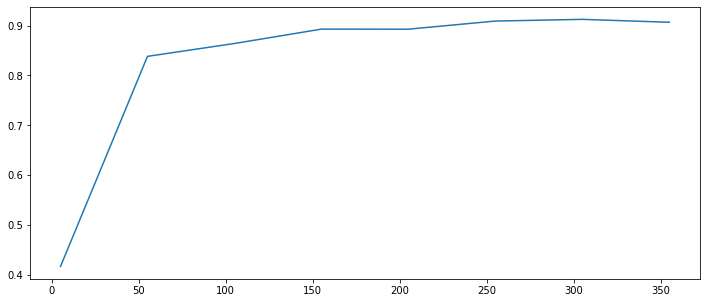

In [536]:
plt.figure(figsize=(12, 5))
plt.plot(list(range(5, 400, 50)), scores)

In [539]:
scores = []
for i in tqdm(range(5, 200, 10)):
    cluster = MiniBatchKMeans(n_clusters=i, init_size=i*3)
    cluster.fit(X)
    scores.append(metrics.silhouette_score(X, cluster.labels_))

100%|██████████| 20/20 [00:06<00:00,  2.86it/s]


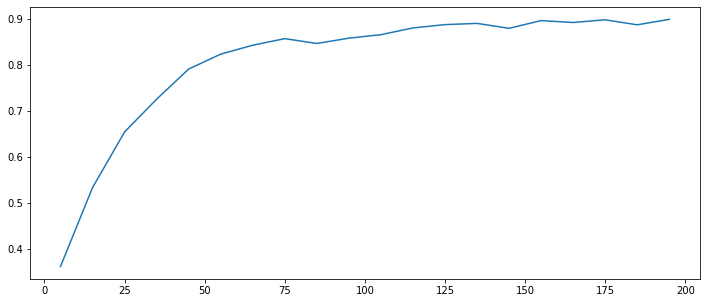

In [540]:
plt.figure(figsize=(12, 5))
plt.plot(list(range(5, 200, 10)), scores)

Сложно утверждать, какое число кластеров должно быть использовано, но оно должно быть примерно около 150 -170.